# 9장. 차원 축소(Dimensionality Reduction)

## 1. 차원의 저주(Curse of Dimensionality)

훈련 샘플 각각이 수천 심지어 수백만 개의 특성을 가지고 있을 때 훈련을 느리게 할 뿐만 아니라, 최적의 솔루션을 찾기 어렵게 만드는 현상

고차원일수록 전체에서 데이터가 차지하는 공간이 매우 적어짐. 즉, 필요한 데이터 양이 기하급수적으로 증가한다.

![](img/1.png)


---

## 2. 차원 축소 (Dimensionality Reduction)

차원 축소는 말 그대로 차원의 수를 줄이는 것, 변수의 수를 줄이는 것을 말한다.
차원축소를 통해 **1) 차원의 저주 탈피**, 그리고 **2) 시각화의 용이성**이라는 이점을 얻을 수 있다.

차원축소에는 **1) Feature Selection(변수 선택)** 과 **2) Feature Extraction(변수 추출)** 두가지 방법이 있는데, 2) Feature Extraction(변수 추출)을 위해 주로 사용되는 PCA에 대해 알아보도록 하자.

### - 주성분분석(PCA: Principal Component Analysis)
Ref) https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/<br>
https://excelsior-cjh.tistory.com/167

**[분산보존]**
![](img/6.png)

PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 **평균제곱거리를 최소화** 하는 축을 찾는다. 아래의 그림에서 왼쪽 2차원 데이터셋을 오른쪽 그림처럼 투영했을 때 C1축으로 투영한 데이터가 **분산이 최대로 보존**되는 것을 확인할 수 있다.

![](img/Uv2dlsH.gif)

여기에서 핑크색 표시가 돼 있는 사선축이 원 데이터의 분산을 최대한 보존하는(=데이터가 가장 많이 흩뿌려져 있는) 새 기저이다. PCA의 목적은 바로 이런 축을 찾는 데 있다.

**[절차]**

1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 

2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.

3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.

4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

이렇게 i-번째 축을 정의하는 단위 벡터(unit vector)를 i-번째 주성분(PC, Principal Component)이라고 한다.

**[공분산]**

n개의 특성(또는 변수)간의 상관정도를 나타낸 값이다. 

![](img/7.png)

**[PCA 계산]**

![](img/8.png)


---
### [실습 1] PCA example with Iris Data-set

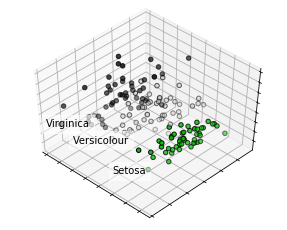

In [4]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

---
### [실습 2] Scikit-Learn을 이용한 [The Iris Dataset] PCA 구하기
**Scikit-Learn에서는 PCA를 계산할 때, 데이터셋에 대한 공분산의 고유값 분해(eigenvalue-decomposition)이 아닌 특이값 분해(SVD, Singular Value Decomposition)를 이용해 계산한다.**

ref) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html<br>
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

**PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)**

   - n_components : int, float, None or string /축소할 차원의 수
   - whiten = True
        - (i) 각 feature들이 상관관계를 최대한 적게 가지게 하고
        - (ii) 각 feature들의 variance를 같게 만들어 줍니다. 
        
### [whiten = True] 일 때,
<img src="./img/whited=True.png" width="700" height="700"></img>

### [whiten = False] 일 때,
<img src="./img/whited=False.png" width="700" height="700"></img>

**PCA의 고유값, 고유벡터 출력하는 법**

pca.explained_variance_ # variance(= eigen value) <br>
pca.components_ # PCA vector(= eigen vector)

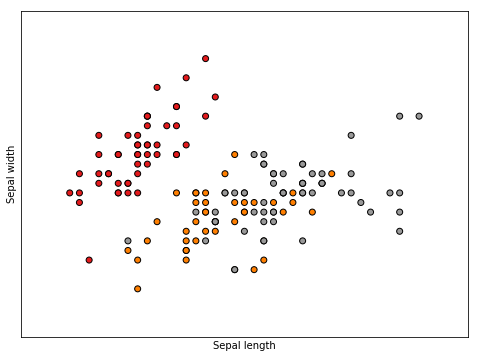

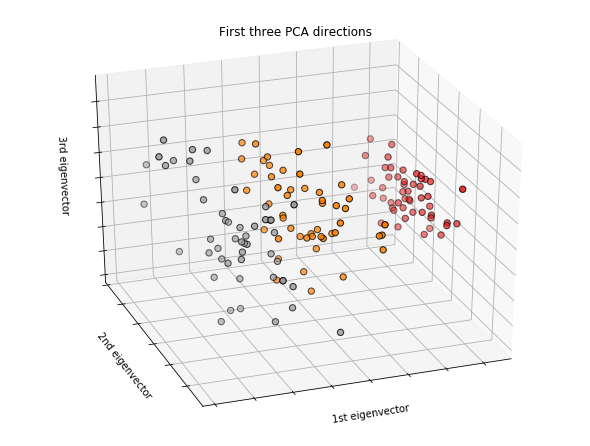

In [25]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

---
### [실습 3] Faces recognition example using eigenfaces and SVMs
 "Eigen Face"라는 얼굴 이미지 데이터에 대하여, 주성분 분석을 이용하여 얼굴을 분류해 보았다.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.141s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set
done in 32.253s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.062s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.47      0.

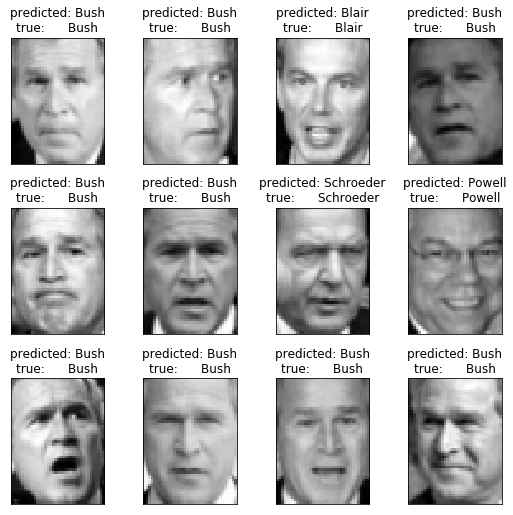

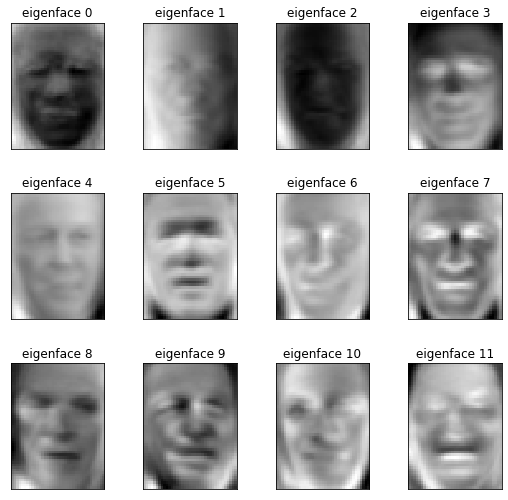

In [2]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

# #############################################################################

# 데이터를 다운로드 합니다.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 데이터 내에 sample 수, 이미지 높이, 이미지 가로 길이 를 불러옵니다.
n_samples, h, w = lfw_people.images.shape

# 사람이미지 data를 X에 저장합니다.
X = lfw_people.data

# data X 내에 column (= feature) 개수를 확인합니다.
n_features = X.shape[1]

# y data를 데이터 셋의 .target 을 넣어서 호출합니다.
y = lfw_people.target
target_names = lfw_people.target_names

# data y 내에 column (= feature) 개수를 확인합니다.
n_classes = target_names.shape[0]  #1차원 array라 shape[0] 해주는것. 이 결과는 결국 len(target_names)와 같음

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# #############################################################################

# # data X, data y를 training, test data 로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# #############################################################################
# n_components 에 축소할 차원 수를 정합니다.
## 앞서 검출한 n_features 를 토대로 축소할 값을 지정합니다.
n_components = 150

print("=================================\nExtracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("=================================\nProjecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# #############################################################################
# SVM Classification을 합니다.

print("=================================\nFitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("=================================\nBest estimator found by grid search:")
print(clf.best_estimator_)

# #############################################################################
# 모델을 평가합니다.

print("=================================\nPredicting people's names on the test set")
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# 예측된 값을 시각화 합니다.

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## [참고한 문법]

In [2]:
import numpy as np
# NumPy에서 중복 제거
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Sam', 'Joe'])

np.unique(names) 
print(np.unique(names))

# 일반 파이썬에서 중복 제거
names = ['Bob', 'Joe', 'Will', 'Bob', 'Sam', 'Joe']

set(names)
print(set(names))

['Bob' 'Joe' 'Sam' 'Will']
{'Joe', 'Sam', 'Bob', 'Will'}


In [10]:
from sklearn import datasets
import pandas as pd
import numpy as np

wine = datasets.load_wine()
X = wine.data

df_X = pd.DataFrame(wine.data, columns = wine.feature_names)

print(df_X.shape)

# DataFrame 에서 행의 갯수 출력
print(df_X.shape[0])

# DataFrame 에서 열의 갯수 출력
print(df_X.shape[1],"\n")

# dataframe이 아니고 1차원 array일 경우 feature뽑을 때 shape[0] 
a = [1,2,3,4]
print(type(a))
a = np.array(a)
print(type(a))

n_classes = a.shape[0] #len한거랑 결국 값 같음
print(n_classes)
print(len(a)) 

(178, 13)
178
13 

<class 'list'>
<class 'numpy.ndarray'>
4
4


---
## scikit-learn의 전처리 기능
https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/

### 스케일링

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

- StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
- RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
- MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
- MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

사용방법은 다음과 같다.

(1) 학습용 데이터의 분포 추정: 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체내에 저장 (2) 학습용 데이터 변환: 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환 (3) 검증용 데이터 변환: 검증용 데이터를 입력으로 하여 transform 메서드를 실행하면 검증용 데이터를 변환

(1)번과 (2)번 과정을 합쳐서 fit_transform 메서드를 사용할 수도 있다.